# **Spotify Basic Recommendation System Project**

Group 38 Members:

Ali Tarık Mırık \
Kaan Atmaca \
Melis Kudat

## Introduction



Spotify is one of the most popular music platforms that enables people to enjoy listening to music depending on their frame of mind and taste. By providing the users a large scale of songs that have different features such as danceability, acousticness, popularity, energy... In this platform, in an attempt to please the users, songs are being offered by Spotify according to the properties of the previous choices of the users. In our project, we examined more than one hundred sixty thousand (+160.000) data involving features of the songs and compared those features with each other in order to catch resemblances and make analysis according to those resemblances. Furthermore, we analyzed the most popular artists and songs in the stated years. In the following steps, the effect of the correlations of the features on the popularity of the songs will be analyzed by statistical tests and the alteration of the preference of the music genres by the time will be demonstrated. As a last step, according to our data analysis and observations, we will create a song recommendation system and predict the popularity of the upcoming songs.

## **Exploratory Data Analysis**

The datasets that we have examined involve the features of the songs on Spotify such as duration, energy, and danceability. In order to analyze the data and make connections, we used 5 datasets. Each dataset contains different features in different numbers. As an instance of this situation data_by_year.csv and data.csv can be given. The dataset of data_by_year involves 14 features about each year while data.csv contains 19 features of songs. The same situation can be observed in the other datasets as well. In order to make our analysis more relatable and multifarious we made use of the different datasets that were given to us. In this step, by using those datasets, we visualized our data by drawing scatters, matrices, and histograms in order to understand our data in a more preferable way. Besides, we analyzed the most popular songs and artists, and we researched about how the genres and features changed overtime.

### Loading Modules and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy import stats
from scipy import special

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_main = pd.read_csv("/content/drive/My Drive/CS210/data.csv")
df_artist = pd.read_csv("/content/drive/My Drive/CS210/data_w_genres.csv")
df_genre = pd.read_csv("/content/drive/My Drive/CS210/data_by_genres.csv")
df_year = pd.read_csv("/content/drive/My Drive/CS210/data_by_year.csv")

### Description of the Dataset & Preprocessing

*We started by bringing the first 5 rows of our data into the forefront to visualize a small part of our data*


In [ ]:
df_main.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [ ]:
df_main.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
174384,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.00006,6,0.178,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020
174385,0.79500,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.00000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021
174386,0.80600,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92000,4,0.113,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020
174387,0.92000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.00000,0,0.113,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.320,2021
174388,0.23900,['Roger Fly'],0.677,197710,0.460,0,57tgYkWQTNHVFEt6xDKKZj,0.89100,7,0.215,-12.237,1,Improvisations,0,2020-12-09,0.0258,112.208,0.747,2020


*We also printed the statistical properties of the feautes to take a general look to our data.*


In [ ]:
df_main.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [ ]:
print("Number of rows (samples) are:", df_main.shape[0], "rows")
print("Number of columns (features) are:", df_main.shape[1], "columns")
df_main.shape

Number of rows (samples) are: 174389 rows
Number of columns (features) are: 19 columns


(174389, 19)

In [ ]:
print("Feature types and counts:")
df_main.info()

Feature types and counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64

#### Manipulating & Cleaning The Data

*We have over 160.000 rows in our data and there might be invalid situations such as null or unclear data. Also we wanted to add columns (from other datasets to our main dataset) to do so we merged and manipulated our datasets.*

*Firstly, we checked for null values in our data. As a result the data was clean and everything was properly assigned.*

In [ ]:
df_main.isna()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174386,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


*In the main dataset the "Artists" strings were stored with brackets and apostrophes. So we cleaned the strings then stored the cleaned strings in another column called "Artist".*

In [ ]:
def clean_artist_name(artist_name):
  artist_name = artist_name.replace('[', '')
  artist_name = artist_name.replace(']', '')
  artist_name = artist_name.replace('"', '')
  artist_name = artist_name.replace('\'','')
  return artist_name

df_main["artist"] = df_main["artists"].apply(clean_artist_name) 

*We had dataframes for songs, artists, genres and years in different datasets. However, we needed the genre of songs to be in the same dataset with the main data set which also had the feature of years. To do so, we merged our df_artist and df_main to be able to observe and analyze the relationship between genres,years, and popularity.*

In [ ]:
def assign_genre(artist_name):
  mask =  df_artist["artists"].values == artist_name
  df_new = df_artist.loc[mask]
  myList = df_new["genres"].tolist()
  return str(myList).replace('[','').replace(']','').replace('"','')

df_main["genres"] = df_main["artist"].apply(assign_genre)  

In [ ]:
df_main.head(5)[["artist", "name", "genres", "year"]]

,artist,name,genres,year
0,Mamie Smith,Keep A Song In Your Soul,"'harlem renaissance', 'traditional blues'",1920
1,Screamin Jay Hawkins,I Put A Spell On You,,1920
2,Mamie Smith,Golfing Papa,"'harlem renaissance', 'traditional blues'",1920
3,Oscar Velazquez,True House Music - Xavier Santos & Carlos Gomi...,'circuit',1920
4,Mixe,Xuniverxe,'glitchcore',1920


###  Visualizations Descriptive Statistics

*These histograms demonstrate the total counts of features (in the ranges of minimum and maximum values of each feature).*

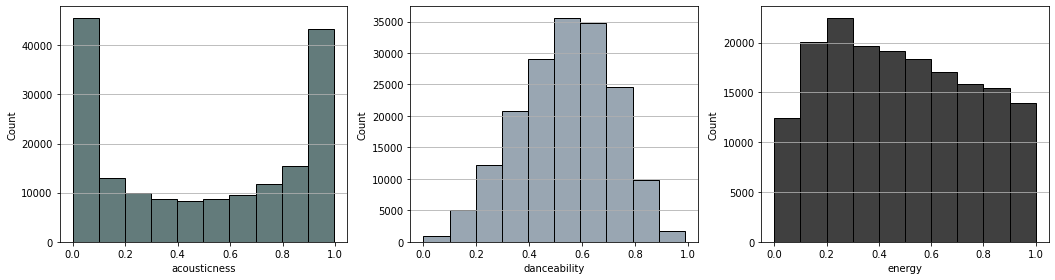

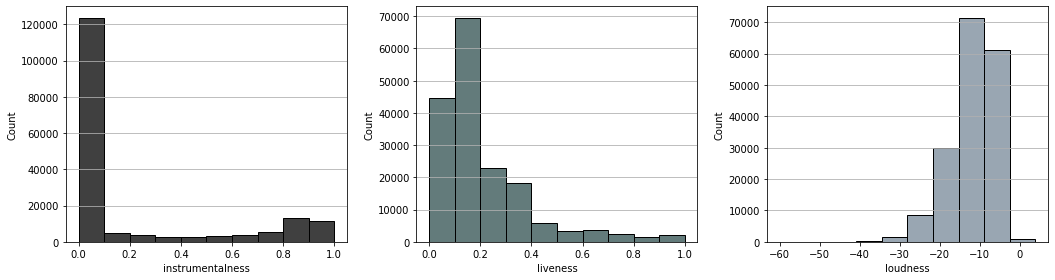

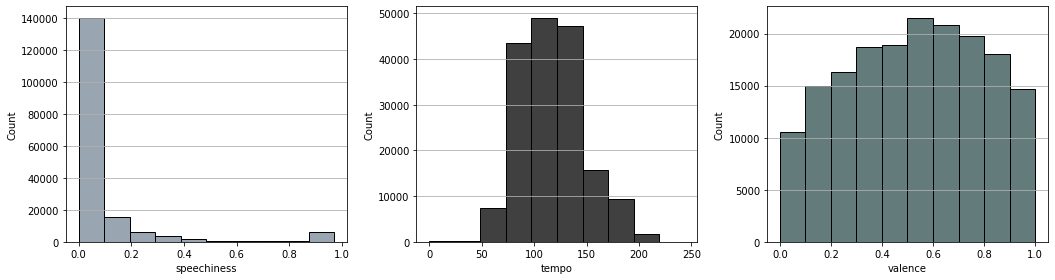

In [ ]:
plt.figure(figsize=(44,4))
attrs = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]
colors = ["darkslategray", "lightslategray", "black", "black", "darkslategray", "lightslategray", "lightslategray", "black", "darkslategray"]
for i in range(len(attrs)):
  plt.grid(axis="y")
  plt.subplot(1, len(attrs), i+1)
  sns.histplot(df_main[attrs[i]], bins=10, color = colors[i])
  if i == 2 or i == 5:
    plt.tight_layout()
    plt.grid(axis="y")
    plt.show()
    plt.figure(figsize=(43.15,4))
  
plt.tight_layout()
plt.grid(axis="y")
plt.show()

*This bar chart provides us the information about the means of the features of the songs which are released in the years between 1920 to 2021.*

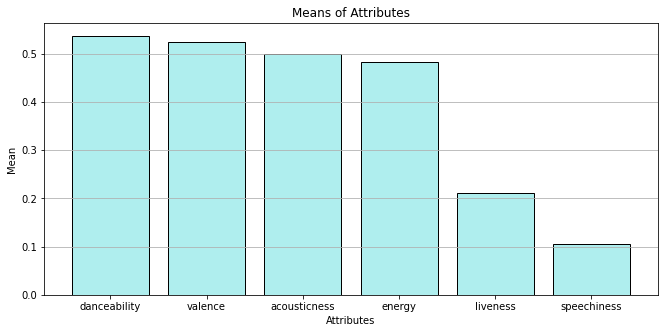

In [ ]:
acc = df_main["acousticness"].mean()
liv = df_main["liveness"].mean()
ene = df_main["energy"].mean()
dan = df_main["danceability"].mean()
spe = df_main["speechiness"].mean()
val = df_main["valence"].mean()

name_of_att = ["danceability", "valence", "acousticness", "energy","liveness",  "speechiness" ]
att = [ dan, val, acc, ene,liv,  spe]
plt.figure(figsize=(11,5)) 
plt.bar(name_of_att, att, color = 'paleturquoise', edgecolor="black")
  
plt.xlabel('Attributes')
plt.ylabel('Mean')
plt.title("Means of Attributes")
plt.grid(axis="y")
plt.show()

*This bar chart provides us the information about the standart derivation of the features of the songs which are released in the years between 1920 to 2021.*

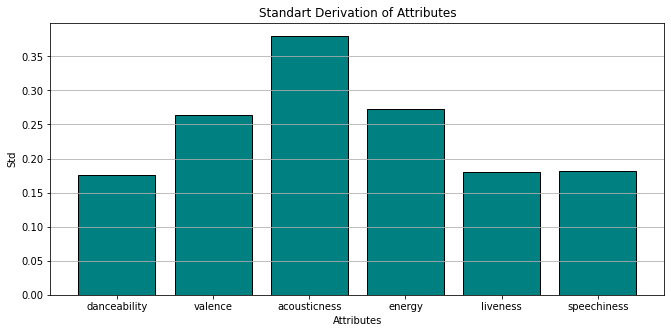

In [ ]:
acc = df_main["acousticness"].std()
liv = df_main["liveness"].std()
ene = df_main["energy"].std()
dan = df_main["danceability"].std()
spe = df_main["speechiness"].std()
val = df_main["valence"].std()

name_of_att = ["danceability", "valence", "acousticness", "energy","liveness",  "speechiness" ]
att = [ dan, val, acc, ene,liv,  spe]
plt.figure(figsize=(11,5)) 
plt.bar(name_of_att, att, color = 'teal', edgecolor="black")
  
plt.xlabel('Attributes')
plt.ylabel('Std')
plt.title("Standart Derivation of Attributes")
plt.grid(axis="y")
plt.show()

*The following four scatter plots show the correlations of popularity with the features acousticness, liveness, energy, and danceability. Doing so we tried to find the correlations of the features with popularity.*

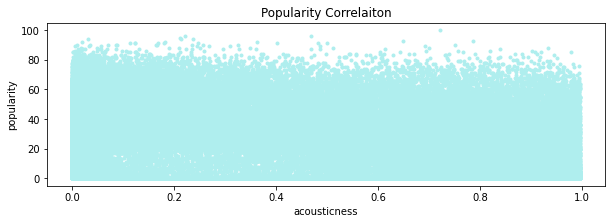

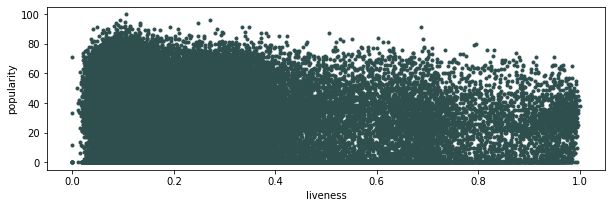

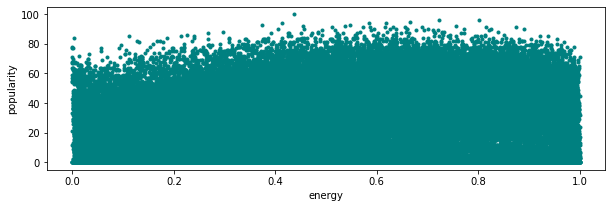

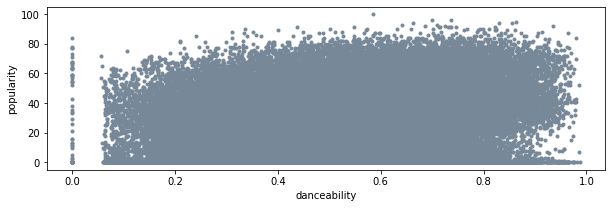

In [ ]:
plt.figure(figsize=(10,3))
sample_data = df_main.sample(100000)
plt.title("Popularity Correlaiton")
plt.scatter(sample_data["acousticness"], sample_data["popularity"], marker='.', color='paleturquoise', label='ys1')
plt.xlabel("acousticness")
plt.ylabel("popularity")
plt.show()

plt.figure(figsize=(10,3))
plt.scatter(sample_data["liveness"], sample_data["popularity"], marker='.', color='darkslategray', label='ys2')
plt.xlabel("liveness")
plt.ylabel("popularity")
plt.show()

plt.figure(figsize=(10,3))
plt.scatter(sample_data["energy"], sample_data["popularity"], marker='.', color='teal', label='ys2')
plt.xlabel("energy")
plt.ylabel("popularity")
plt.show()

plt.figure(figsize=(10,3))
plt.scatter(sample_data["danceability"], sample_data["popularity"], marker='.', color='lightslategray', label='ys2')
plt.xlabel("danceability")
plt.ylabel("popularity")
plt.show()

*This scatter plot demonstrates the correlation between loudness and energy, with this scatter plot we can observe that there is a positive correlation between those two features.*

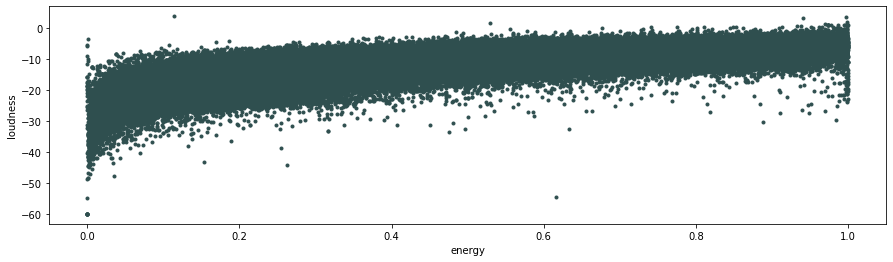

In [ ]:
plt.figure(figsize=(15,4))
plt.scatter(df_main["energy"], df_main["loudness"], marker='.', color='darkslategray')
plt.xlabel("energy")
plt.ylabel("loudness")
plt.show()

*This plot shows the negative correlation between energy and acousticness.*

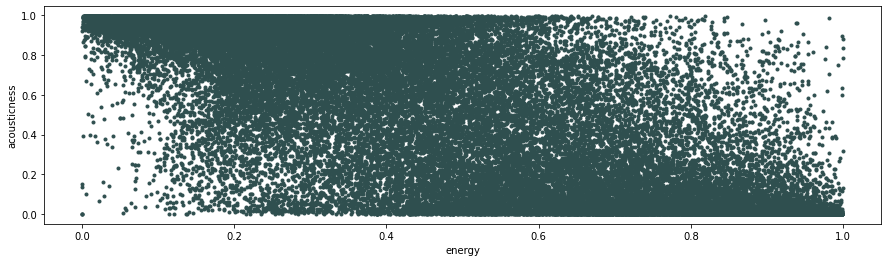

In [ ]:
plt.figure(figsize=(15,4))
plt.scatter(df_main["energy"].head(50000), df_main["acousticness"].head(50000), marker='.', color='darkslategray', label='ys2')
plt.xlabel("energy")
plt.ylabel("acousticness")
plt.show()

*This correlation matrix demonstrates us the the correlations between all features that provides us to examine whether the correlation of two features are negative, positive or whether they are correlated or not.*

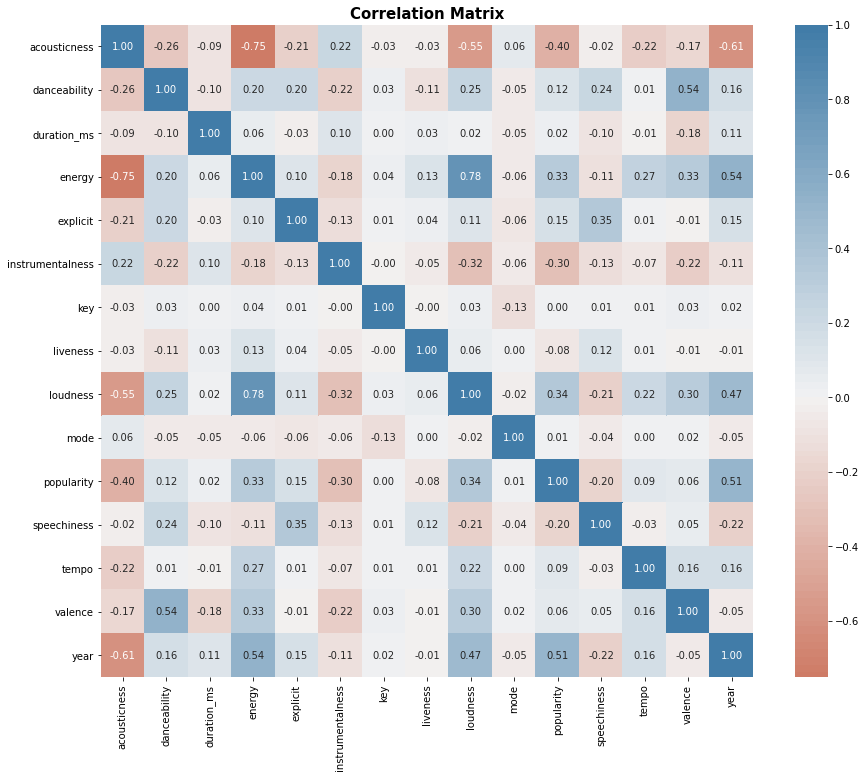

In [ ]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 240, n=100)
corr = df_main.corr()
sns.heatmap(corr, annot=True, fmt=".2f",  cmap=palette, square=True, center = 0)
plt.title("Correlation Matrix",size=15, weight='bold')
plt.show()

### Analysis of the Most Popular Artists and Songs

*The following horizontal bar chart provides us the top 10 songs that have the highest popularities between the years of 1920 and 2021*


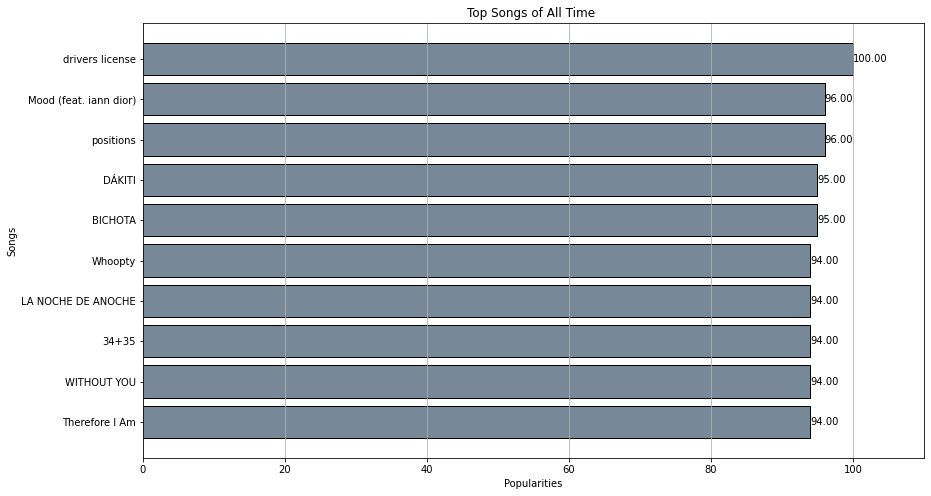

In [ ]:
values = df_main.sort_values(by=["popularity"]).tail(10)["popularity"].to_list()
categories = df_main.sort_values(by=["popularity"]).tail(10)["name"].to_list()
plt.figure(figsize=(14,8))
plt.barh(categories, values, color = "lightslategray", edgecolor="black")

for value, cat in zip(values, categories):
  plt.text(value, cat, f"{value:.2f}", verticalalignment="center", fontsize=10)

plt.xlim([0, max(values)+10])
plt.xlabel("Popularities")
plt.ylabel("Songs")
plt.title("Top Songs of All Time ")
plt.grid(axis="x")

plt.show()

*The following horizontal bar chart demonstrates the most popular artists in the year range of 1920-2021.*

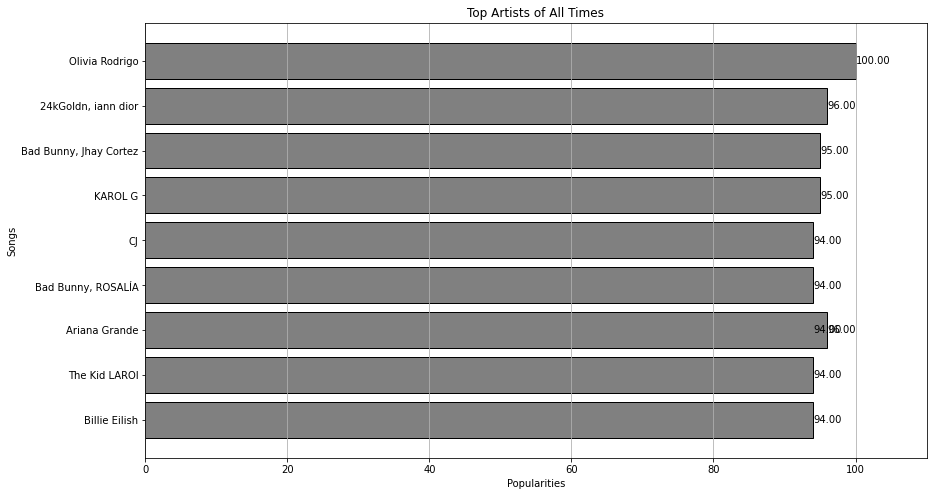

In [ ]:
values = df_main.sort_values(by=["popularity"]).tail(10)["popularity"].to_list()
artists = df_main.sort_values(by=["popularity"]).tail(10)["artist"].to_list()
plt.figure(figsize=(14,8))
plt.barh(artists, values, color = "gray", edgecolor="black")

for value, cat in zip(values, artists):
  plt.text(value, cat, f"{value:.2f}", verticalalignment="center", fontsize=10)

plt.xlim([0, max(values)+10])
plt.xlabel("Popularities")
plt.ylabel("Songs")
plt.title("Top Artists of All Times")
plt.grid(axis="x")
plt.show()

*In this part of the code, the year is asked to the user as an input. After the input is taken, the table gives the user information of the top 5 songs in the years between (input year - 5) and (input year + 5 )*

In [ ]:
year = int(input("Enter a year between 1920-2021: "))
while(year < 1920 or year > 2021):
  year = input("Wrong input. Please enter a year between 1920-2021: ")
df_filtered = df_main[df_main["year"] < 5 + year]
df_filtered = df_filtered[df_filtered["year"] > year - 5]
df_filtered = df_filtered.sort_values(by=['popularity'], ascending=False)

print("Top five songs of", year-5, "-", year+5, ":")
df_filtered[["name", "artists", "popularity", "release_date"]].head(5)

Enter a year between 1920-2021: 2000
Top five songs of 1995 - 2005 :


,name,artists,popularity,release_date
15862,Yellow,['Coldplay'],85,2000-07-10
15868,In the End,['Linkin Park'],83,2000-10-24
16263,'Till I Collapse,"['Eminem', 'Nate Dogg']",83,2002-05-26
16265,The Scientist,['Coldplay'],83,2002-08-08
16264,Without Me,['Eminem'],82,2002-05-26


*In these bar charts we wanted to compare the means of the features of the most popular 50 songs and all the songs.*

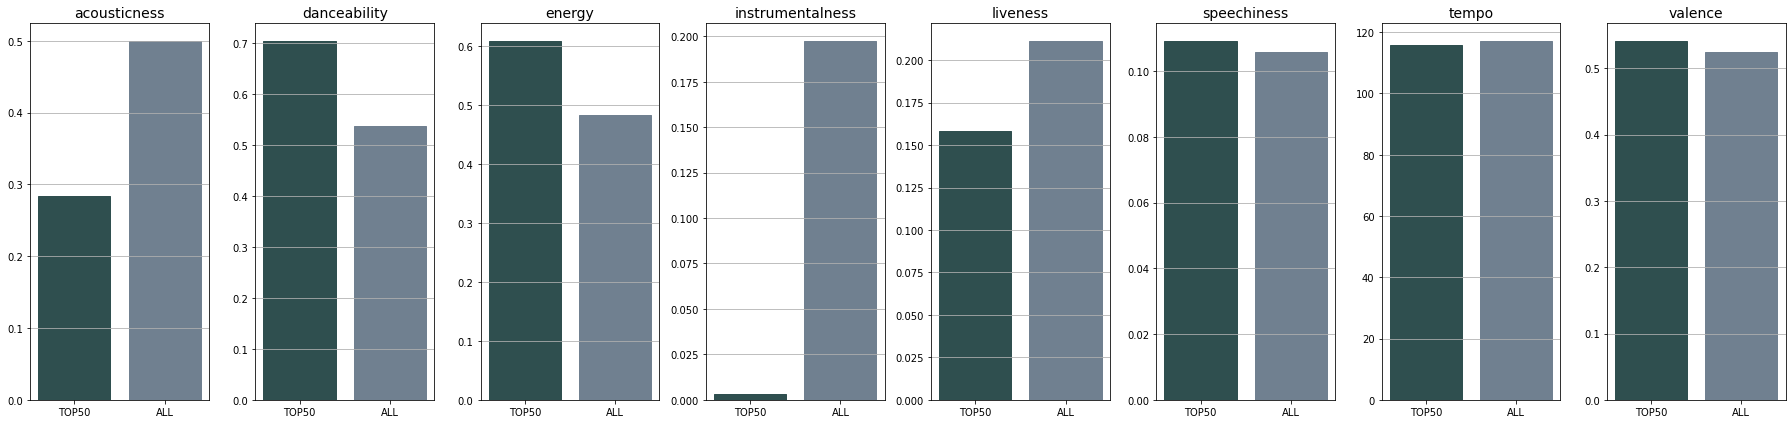

In [ ]:
top_50 = df_main.sort_values(by=["popularity"]).tail(50)
attrs = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "tempo", "valence"]
plot_data = {x:[top_50[x].mean(), df_main[x].mean()] for x in attrs}
fig, axs = plt.subplots(1,8, figsize=(25,6))
colors = ["darkslategray", "slategray"]

for i in range(8):
  a = axs[i].bar(["TOP50","ALL"],plot_data[attrs[i]], edgecolor="black")
  a[0].set_color(colors[0])
  a[1].set_color(colors[1])
  axs[i].set_title(attrs[i], fontsize=14)
  axs[i].grid(axis="y")

plt.tight_layout()
plt.show()

### Genres & Features Over Time

*The following horizontal bar chart provides us the top 10 most used genres in the years between 1920-2021*

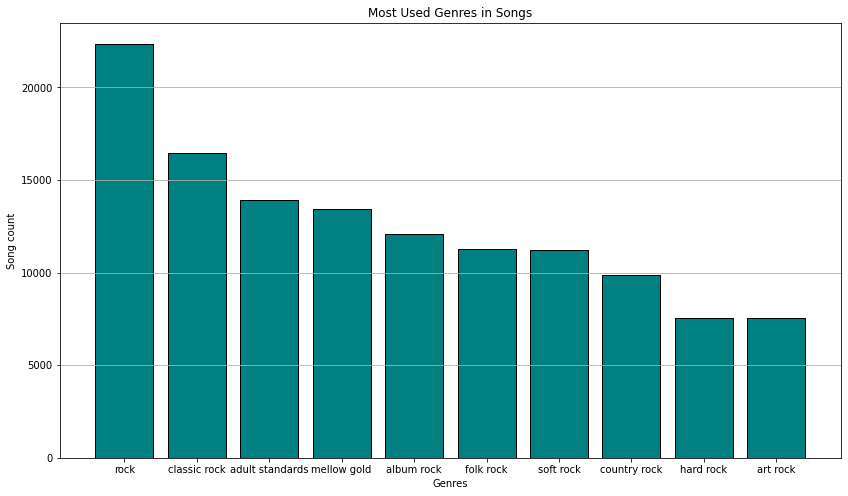

In [ ]:
def get_mostused_genres():
  genre_popularities = {}
  for idx, song in df_main.iterrows():
    if len(song["genres"])!=0:
      genres = song["genres"].strip("[]'").split("', '")
      for g in genres:
        if g not in genre_popularities.keys():
          genre_popularities[g] = 1
        else:
          genre_popularities[g] += 1
  
  top_genres = list(sorted(genre_popularities.items(), key=lambda item: item[1]))
  top_genres.reverse() 
  for i in top_genres: 
    if i[0] == "" : 
      top_genres.remove(i)
  top_genres = top_genres[:10]
  return top_genres

top_genres=get_mostused_genres()
plt.figure(figsize=(14,8))
for i in top_genres:
  plt.bar(i[0], i[1], color="teal",  edgecolor="black")

plt.xlabel("Genres")
plt.ylabel("Song count")
plt.title("Most Used Genres in Songs")
plt.grid(axis="y")
plt.show()

*The following horizontal bar chart provides us the top 10 genres that have the highest popularities.*

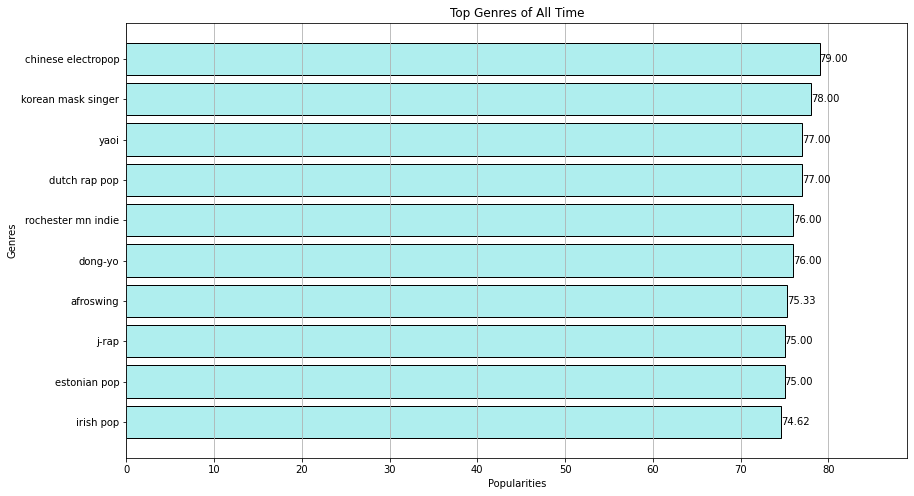

In [ ]:
values = df_genre.sort_values(by=["popularity"]).tail(10)["popularity"].to_list()
categories = df_genre.sort_values(by=["popularity"]).tail(10)["genres"].to_list()
plt.figure(figsize=(14,8))
plt.barh(categories, values, color="paleturquoise", edgecolor="black")

for value, cat in zip(values, categories):
  plt.text(value, cat, f"{value:.2f}", verticalalignment="center", fontsize=10)

plt.xlim([0, max(values)+10])
plt.xlabel("Popularities")
plt.ylabel("Genres")
plt.title("Top Genres of All Time")
plt.grid(axis="x")
plt.show()

*To analyze the genres change over time, we counted the number of songs in that genre in a range of years. We choose to analyze for every 10 years. There can be seen that some genres gain popularity over time and some become less popular. Pop songs for example, had a spike in popularity in recent years.*

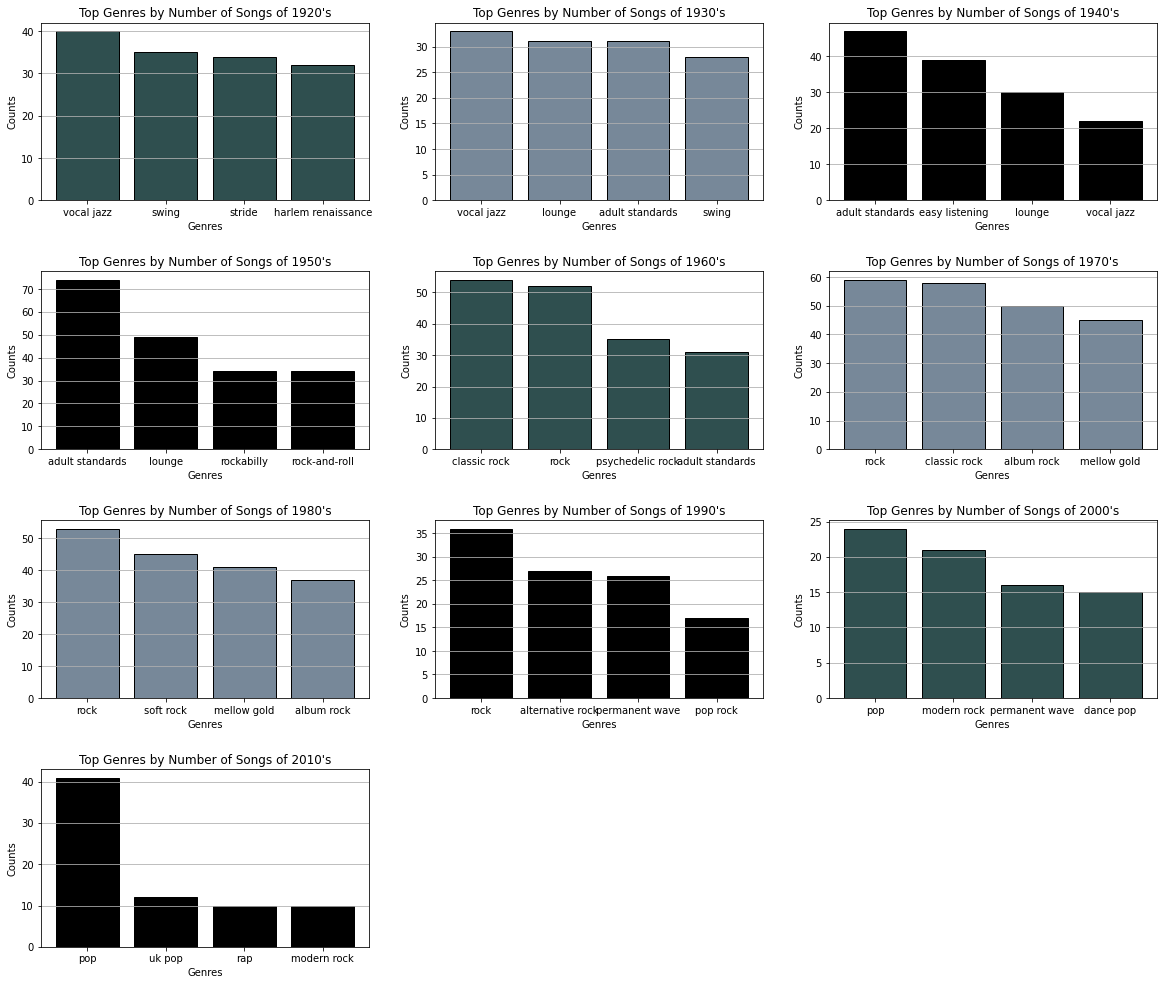

In [ ]:
def get_popular_genres(year):
  df_top_songs = df_main[df_main["year"] < 5 + year]
  df_top_songs = df_top_songs[df_top_songs["year"] > year - 5]
  df_top_songs = df_top_songs.sort_values(by=['popularity'], ascending=False)
  df_top_songs = df_top_songs.head(100)

  genre_popularities = {}

  for idx, song in df_top_songs.iterrows():
    if len(song["genres"])!=0:
      genres = song["genres"].strip("[]'").split("', '")
      for g in genres:
        if g not in genre_popularities.keys():
          genre_popularities[g] = 1
        else:
          genre_popularities[g] += 1
  top_genres = list(sorted(genre_popularities.items(), key=lambda item: item[1]))
  top_genres.reverse()
  top_genres = top_genres[:4]

  return top_genres

colors = ["darkslategray", "lightslategray", "black", "black", "darkslategray", "lightslategray", "lightslategray", "black", "darkslategray", "black"]
fig, axs = plt.subplots(4,3,figsize=(20,17), gridspec_kw={'hspace': 0.4, 'wspace': 0.2})
for i in range(10):
  top_genres=get_popular_genres(1925 + i*10)
  genres = [x[0] for x in top_genres]
  counts = [x[1] for x in top_genres]
  axs[int(i/3), i%3].bar(genres, counts, color = colors[i], edgecolor="black")
  axs[int(i/3), i%3].set_title("Top Genres by Number of Songs of " + str(1920 + i*10) + "'s")
  axs[int(i/3), i%3].set_xlabel("Genres")
  axs[int(i/3), i%3].set_ylabel("Counts")
  axs[int(i/3), i%3].grid(axis="y")

fig.delaxes(axs[3][1])
fig.delaxes(axs[3][2])

plt.show()

*The lines in the plot demonstrate the increase or the decrease in the specified features of the songs in the time range of 1920-2021. According to the results, we can claim that zigzags are observed in all of the three features between 1920- 1950. After that year, liveness of the songs show stability while the other two properties demonstrate sharp increase and decrease.*

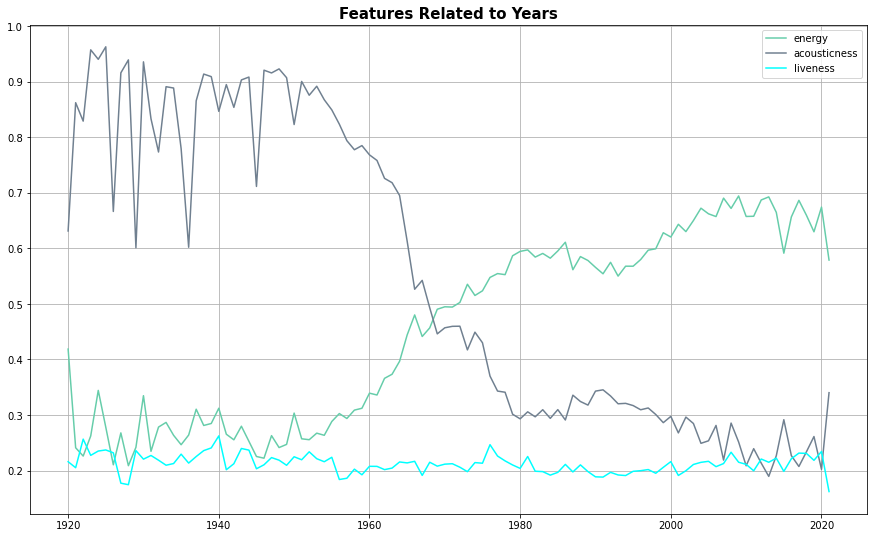

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(df_main.groupby('year').mean()['energy'], label="energy", color = "mediumaquamarine")
plt.plot(df_main.groupby('year').mean()['acousticness'], label="acousticness", color = "slategray")
plt.plot(df_main.groupby('year').mean()['liveness'], label="liveness", color = "aqua")
plt.legend()
plt.title("Features Related to Years",size=15, weight='bold')
plt.grid()
plt.show()

*In this part, we observed the state of affairs of two features that are instrumenalness and valence. By that, we can claim that for both of the two features, statibility is not observed while sharp increase and decrease are seen between the years of 1920-2020*

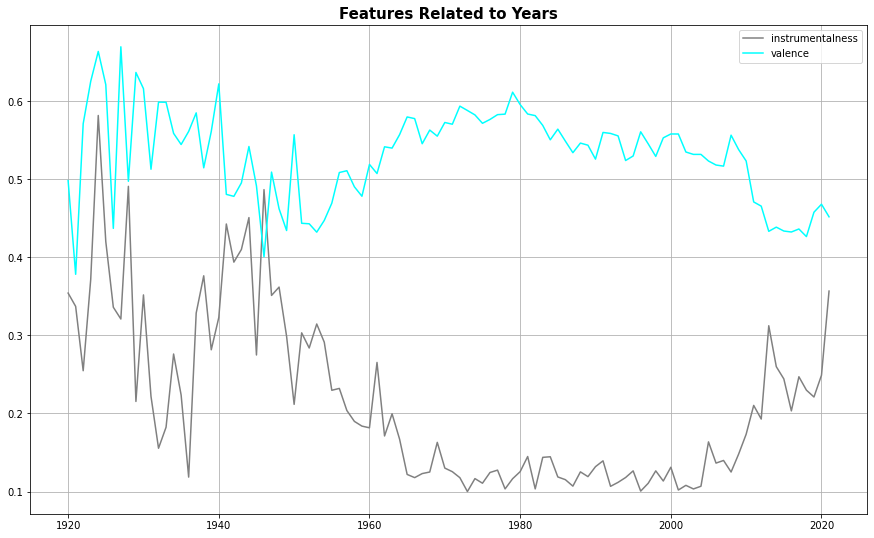

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(df_year.groupby('year').mean()['instrumentalness'], label="instrumentalness", color = "gray")
plt.plot(df_year.groupby('year').mean()['valence'], label="valence", color = "aqua")
plt.legend()
plt.title("Features Related to Years",size=15, weight='bold')
plt.grid()
plt.show()

As we have observed by analyzing and visualizing our data, the features of the songs have significant influence on the popularity of the songs on Spotify. Therefore, understanding how and in which range those features affect the popularity has a huge importance for the prediction of the popularity of the upcoming songs. In the next steps of our project, we will try to examine the contributions of the features on the popularity by applying statistical tests. Later on, we will evaluate the alteration of the features in a different timeline for the same music genres by statistical tests as well. As we stated before, the prediction of the songs’ popularity is extremely important to increase the preferability of the songs. Therefore, we will use several machine learning models to predict the popularity. In order to increase the productivity of the models, we will make endeavor on hyper-parameter tuning. As our last step, we will create our own song recommendation system by using similarities and methods such as Nearest Neighbors.



## Hyphothesis Testing


### Hypothesis 1


Hypothesis Test: Our purpose in this part is to examine whether or not there exists an obvious change in the popularity of the Spotify songs depending on the mode (minor or major).


Null Hypothesis ($H_0$): Means of `popularity` samples for all modes of the songs (minor or major) have the same value (e.g. $m_1$ denotes 1st mode of the sample songs)

$ {H_0}: \mu{m1} = \mu{m_2} $

Alternative Hypothesis ($H_A$): Means of `popularity` samples for all modes of the songs are not the same.


$ {H_A}:$ Means $\mu{m1}, \mu{m_2} $ are not same.

Significance level: As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.

In [ ]:
sample_1 = df_main[df_main['mode'] == 0]
sample_2 = df_main[df_main['mode'] == 1]

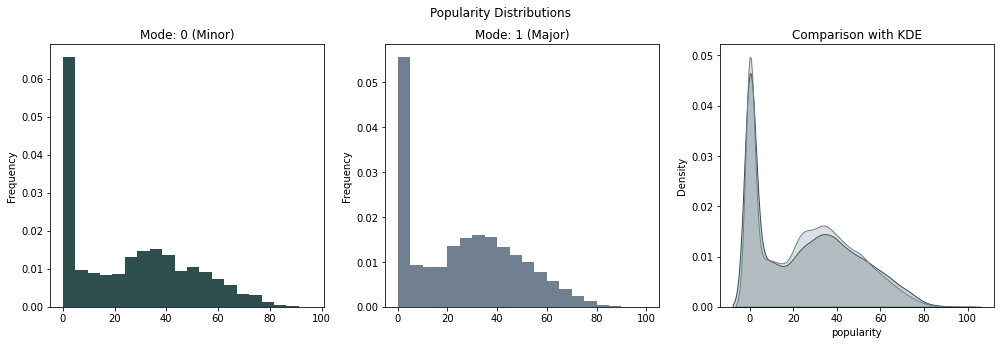

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
sample_1['popularity'].plot(kind="hist", ax=ax[0], bins=20, label="completed", color="darkslategray", density=True)
ax[0].set_title("Mode: 0 (Minor)")

sample_2['popularity'].plot(kind="hist", ax=ax[1], bins=20, label="none", color="slategray", density=True)
ax[1].set_title("Mode: 1 (Major)")

sns.kdeplot(sample_1['popularity'], shade=True, label="Target: 0", ax=ax[2], color="darkslategray")
sns.kdeplot(sample_2['popularity'], shade=True, label="Target: 1", ax=ax[2], color="slategray")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Popularity Distributions")

# To make a clearer layout for the graphs
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
f_stats, p_values = stats.f_oneway(sample_1['popularity'].values, sample_2['popularity'].values)
p_values

0.0013954883149110233

A p-value higher than 0.05 has the meaning of supporting the null hypothesis and rejecting the alternative hypothesis. In our case, we had the value of 0.001 that led us to understand that we had to reject null hypothesis and accept the alternative hypothesis. Which means popularity changes with the mode of the song (i.e. whether the song is in minor or major cord).

### Hypothesis 2

Hypothesis Test: Our purpose in this part is to examine the change in the features of the pop songs before and after the millenium (2000).


Null Hypothesis ($H_0$): Means of `danceability`, `popularity` and `acousticness` samples for songs before the year 2000 have the same value with the means of the features of the songs that came after 2000 (e.g. $md_1$ denotes mean of danceability for songs before 2000).

$ {H_0}: \mu{md_1} = \mu{md_2} \ \ \mu{mp_1} = \mu{mp_2} \ \ \mu{ma_1} = \mu{ma_2}$

Alternative Hypothesis ($H_A$): Means of `danceability`, `popularity` and `acousticness` samples changed before and after the year 2000.

$ {H_A}:$ Means $\mu{md_1}, \mu{md_2} $ and $ \mu{mp_1}, \mu{mp_2} $ and $ \mu{ma_1}, \mu{ma_2} $ are not same.

Significance level: We are setting it as 0.05 for our this test too.

In [ ]:
# Creating samples based on the year and the genre

sample_1 = df_main[df_main['year'] < 2000]
sample_1 = sample_1[sample_1['genres'].str.contains("pop")]

sample_2 = df_main[df_main['year'] >= 2000]
sample_2 = sample_2[sample_2['genres'].str.contains("pop")]


Ttest_indResult(statistic=-24.61726135953137, pvalue=7.074014639343059e-132)
Ttest_indResult(statistic=-61.846811578357226, pvalue=0.0)
Ttest_indResult(statistic=55.84450963692926, pvalue=0.0)


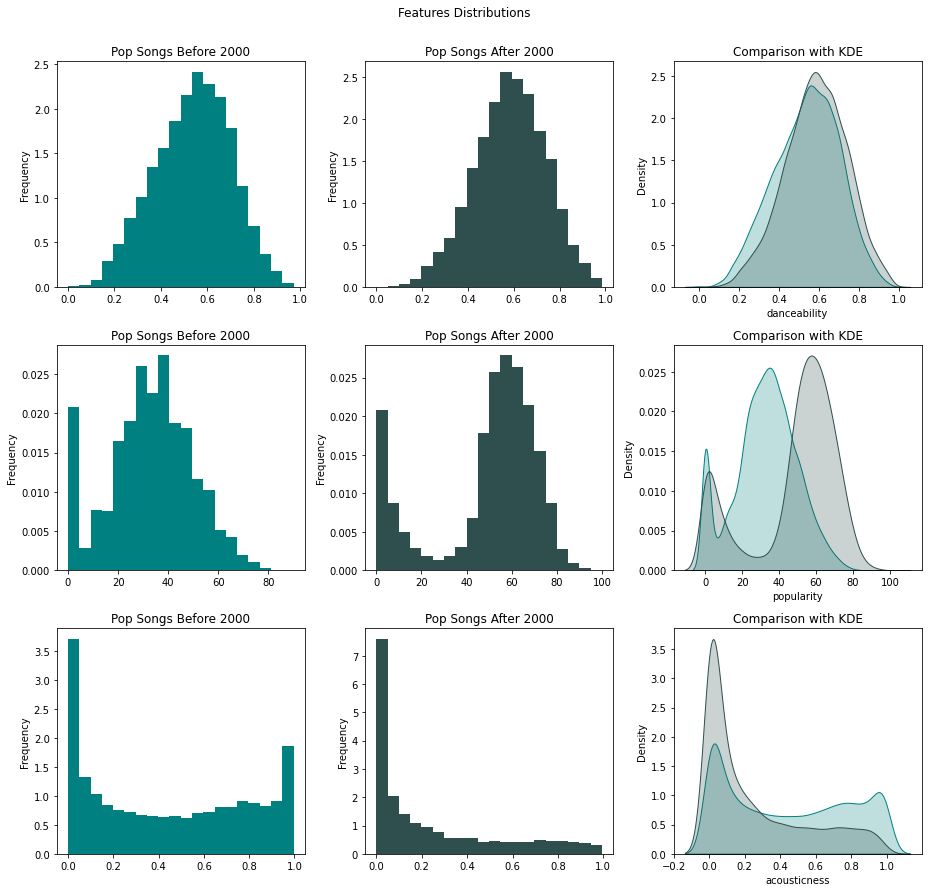

In [ ]:
#we want to examine this three features
features = ['danceability', 'popularity', 'acousticness']

fig, ax = plt.subplots(3, 3, figsize=(13,13))

for i in range(len(features)):
  f = features[i]
  sample_1[f].plot(kind="hist", ax=ax[i][0], bins=20, label="completed", color="teal", density=True)
  ax[i][0].set_title("Pop Songs Before 2000")

  sample_2[f].plot(kind="hist", ax=ax[i][1], bins=20, label="none", color="darkslategray", density=True)
  ax[i][1].set_title("Pop Songs After 2000")

  sns.kdeplot(sample_1[f], shade=True, label="Target: 0", ax=ax[i][2], color="teal")
  sns.kdeplot(sample_2[f], shade=True, label="Target: 1", ax=ax[i][2], color="darkslategray")
  ax[i][2].set_title("Comparison with KDE")

  print(stats.ttest_ind(sample_1[f], sample_2[f], equal_var=False))  # since we have not equal variances


plt.suptitle("Features Distributions")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

At the first glance while looking at the first graph that represents the “danceability” of the songs, we thought that the means were the same before and after the year of 2000. However, after calculating the p-value we realized that we were wrong and the p-value was smaller than 0.05. Since p-value was close to 0 we became able to understand that rejecting null hypothesis was the right decision. Besides, according to the graphs of the second row, which represented the popularity of the songs before and after the year of 2000 and their comparison, it is possible to claim that popularity of the pop songs has increased after 2000. This situation demonstrates that popularity of the pop songs are affected by the year changes. In the last row, we see the histogram of acousticness levels of the pop songs in the timeline of pre-2000’s and post-2000’s. By that graphs, one can state that the feature of acousticness has decreased as the time passes. This situation, which is the decrease of the acousticness of songs, is also seen in the comparison graph.

## Machine Learning
In this step , our purposes were using machine learning algorithms in order to guess the popularity of the songs according to the features of the songs, and to make a simple Spotify song recommendation system that takes song names and artist names as inputs from the user and recommends songs to the user according to his/her music taste. To do so, at first we cleaned and checked our data to be sure that no irrelavent (i.e ,id number of the songs) and invalid data was existing in our dataset. Then, we did label encoding for the features which were important for popularity guessing but were not in the right form. After that, we used the algorithms of linear regression, random forest, and decision tree in order to observe the difference between the real and the predicted popularity values. We analyzed the error rates and how they change in different algorithms that were explained in the previous sentence. Besides, we observed changing hypermeter impact on the error. In the last part, we made a song recommendation system that takes name of the songs and the artists as inputs and gives similar songs back to the users according to the features of the songs that were given as input at the first place.


### Preprocessing for Machine Learning
In this preprocessing for machine learning part, firstly , we copied our data that exist in df_main to a new dataframe that is called as ml_data . Following that , we have analyzed this dataframe by demonstrating column, row numbers and data amounts, and the validity of the values in the columns, rows.

In [ ]:
ml_data = df_main.copy() #create a new dataframe for machine learning
ml_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,artist,genres
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,Mamie Smith,"'harlem renaissance', 'traditional blues'"
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,Screamin Jay Hawkins,
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,Mamie Smith,"'harlem renaissance', 'traditional blues'"
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,Oscar Velazquez,'circuit'
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920,Mixe,'glitchcore'


In [ ]:
ml_data.size

3662169

In [ ]:
ml_data.shape

(174389, 21)

In [ ]:
ml_data.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year', 'artist', 'genres'],
      dtype='object')

In [ ]:
print("Is there null:")
for col in ml_data:
  check_for_nan = ml_data[col].isnull().values.any()
  print(col, " - ", check_for_nan)

Is there null:
acousticness  -  False
artists  -  False
danceability  -  False
duration_ms  -  False
energy  -  False
explicit  -  False
id  -  False
instrumentalness  -  False
key  -  False
liveness  -  False
loudness  -  False
mode  -  False
name  -  False
popularity  -  False
release_date  -  False
speechiness  -  False
tempo  -  False
valence  -  False
year  -  False
artist  -  False
genres  -  False


In [ ]:
ml_data.isna().sum()*100/ml_data.shape[0]

acousticness        0.0
artists             0.0
danceability        0.0
duration_ms         0.0
energy              0.0
explicit            0.0
id                  0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
mode                0.0
name                0.0
popularity          0.0
release_date        0.0
speechiness         0.0
tempo               0.0
valence             0.0
year                0.0
artist              0.0
genres              0.0
dtype: float64

In [ ]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

We do not have any invalid values in the columns. So we didn't need to fix or drop any columns related to this issue.

However, we dropped the columns which are not numeric or not related to popularity (like *key* and *id*).

In [ ]:
ml_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,artist,genres
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,Mamie Smith,"'harlem renaissance', 'traditional blues'"
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,Screamin Jay Hawkins,
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,Mamie Smith,"'harlem renaissance', 'traditional blues'"
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,Oscar Velazquez,'circuit'
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920,Mixe,'glitchcore'


######Label Encoding
In our dataset , the name of the artists and the genres of the songs were given to us in a form of strings. However, in order to use those informations in the upcoming parts we had to transform them into numerical values. Thus, we made new columns that have the numerical transformations of the values in the columns of artists and genres.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

ml_data["artists_encoded"] = encoder.fit_transform(ml_data[["artists"]])
ml_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,artist,genres,artists_encoded
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,Mamie Smith,"'harlem renaissance', 'traditional blues'",21071.0
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,Screamin Jay Hawkins,,303.0
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,Mamie Smith,"'harlem renaissance', 'traditional blues'",21071.0
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,Oscar Velazquez,'circuit',24517.0
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920,Mixe,'glitchcore',22782.0


In [ ]:
ml_data["genres_encoded"] = encoder.fit_transform(ml_data[["genres"]])
ml_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,artist,genres,artists_encoded,genres_encoded
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,Mamie Smith,"'harlem renaissance', 'traditional blues'",21071.0,6560.0
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,Screamin Jay Hawkins,,303.0,0.0
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,Mamie Smith,"'harlem renaissance', 'traditional blues'",21071.0,6560.0
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,Oscar Velazquez,'circuit',24517.0,4034.0
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920,Mixe,'glitchcore',22782.0,6419.0


######Cleaning Data
Since in the next step we were going to use regression to guess popularity, we had to get rid of columns that were irrelevant to our purpose such as "key" and "id" . Besides, because of the fact that we encoded the columns of genres and artists we removed the string version columns of them from our dataframe.

In [ ]:
ml_data = ml_data.drop(["id","key","artist","artists","genres","name", "release_date", "explicit", "mode"], axis=1)
ml_data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,year,artists_encoded,genres_encoded
0,0.991000,0.598,168333,0.224,0.000522,0.3790,-12.628,12,0.0936,149.976,0.6340,1920,21071.0,6560.0
1,0.643000,0.852,150200,0.517,0.026400,0.0809,-7.261,7,0.0534,86.889,0.9500,1920,303.0,0.0
2,0.993000,0.647,163827,0.186,0.000018,0.5190,-12.098,4,0.1740,97.600,0.6890,1920,21071.0,6560.0
3,0.000173,0.730,422087,0.798,0.801000,0.1280,-7.311,17,0.0425,127.997,0.0422,1920,24517.0,4034.0
4,0.295000,0.704,165224,0.707,0.000246,0.4020,-6.036,2,0.0768,122.076,0.2990,1920,22782.0,6419.0


### Machine Learning For Popularity Prediction
In order to make a prediction of the popularity of the songs according to their features such as danceability,liveness, and so on , we used algorithms of linear regression, random forest, and decision tree. We compared the real values of the popularities and the predicted values that are obtained by those machine learning algorithms. Later on, we made a comparison of the errors that occurred by those algorithms and chose the most proper algorithm by looking the minimum error.

#### Splitting The Dataset For Training, Validation And Test
In the splitting the dataset part, we spared our machine learning data into three parts that are train , test , and validation. First, we took test size as 0.2 and the remainder 0.8 value was splitted into validation and train set also in the size of 0.2 . Later on, we removed "popularity" column from our x's (x_train , x_test , x_val) since it was the feature to be guessed and made y's (y_train , y_val , y_test) that contain only the column of popularity.

In [ ]:
#Split the dataset
from sklearn.model_selection import train_test_split

#train and test
train, test = train_test_split(ml_data, test_size=0.2, random_state=42)

#train and validation
train, val = train_test_split(train, test_size=0.2, random_state=42)


X_train = train.drop(["popularity"],axis=1)
Y_train = train["popularity"]

X_val = val.drop(["popularity"],axis=1)
Y_val = val["popularity"]

X_test = test.drop(["popularity"],axis=1)
Y_test = test["popularity"]

#X_train, X_test, Y_train, Y_test = train_test_split(ml_data, ml_data["popularity"], test_size=0.2, random_state=42)

print("Size of X_train:", X_train.size)
print("Size of X_test:" ,X_test.size)

Size of X_train: 1450904
Size of X_test: 453414


In [ ]:
X_train.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,year,artists_encoded,genres_encoded
45126,0.97100,0.379,166467,0.2130,0.926,0.333,-11.271,0.0327,124.862,0.165,1954,5991.0,220.0
112214,0.99400,0.176,181760,0.1810,0.923,0.151,-18.936,0.0345,73.041,0.264,1948,16376.0,0.0
62838,0.97100,0.424,527600,0.1230,0.408,0.197,-19.964,0.0523,116.668,0.104,1951,35577.0,0.0
7575,0.95100,0.572,165667,0.0774,0.893,0.115,-26.113,0.0484,120.311,0.807,1958,2787.0,5782.0
122973,0.00007,0.642,277867,0.7940,0.348,0.146,-7.908,0.0309,119.550,0.785,2002,18806.0,896.0


#### Linear Regression

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

##### Popularity vs Danceability

In [ ]:
l1 = ml_data["danceability"].values.reshape(-1,1)
y1 = ml_data["popularity"].values.reshape(-1,1)

In [ ]:
l1_train, l1_test, y1_train, y1_test = train_test_split(l1, y1, random_state=42, test_size=0.2)

In [ ]:
regr1 = linear_model.LinearRegression()
regr1.fit(l1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y1_pred = regr1.predict(l1_test)
y1_pred

array([[22.40082013],
       [25.84231993],
       [20.84211395],
       ...,
       [25.99664728],
       [22.20019458],
       [26.98434228]])

The table below, demonstrates the real values of popularities in the dataframe and the predicted values of the popularity that were guessed by the algorithm of linear regression according to the feature of danceability of the songs.

In [ ]:
df1 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_pred.flatten()})
df1

,Actual,Predicted
0,51,22.400820
1,52,25.842320
2,0,20.842114
3,81,26.706553
4,67,26.181840
...,...,...
34873,5,23.635439
34874,7,24.715730
34875,54,25.996647
34876,0,22.200195


This graph is the visualization of the data that are shown in the above table.

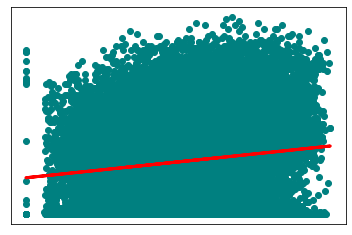

In [ ]:
plt.scatter(l1_test, y1_test,  color='teal')
plt.plot(l1_test, y1_pred, color='red', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
print('Coefficients: \n', regr1.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y1_test, y1_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y1_test, y1_pred))

Coefficients: 
 [[15.43273452]]
Mean squared error: 472.49
Coefficient of determination: 0.01


The coefficient of determination that is given to us by that algorithm is 0.01 which is far away from the value of 1. Thus, the linear regression popularity prediction by danceability did not provide us a good prediction.

##### Popularity vs Liveness

In [ ]:
l2 = ml_data["liveness"].values.reshape(-1,1)
y2 = ml_data["popularity"].values.reshape(-1,1)

In [ ]:
l2_train, l2_test, y2_train, y2_test = train_test_split(l2, y2, random_state=42, test_size=0.2)

In [ ]:
regr2 = linear_model.LinearRegression()
regr2.fit(l2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y2_pred = regr2.predict(l2_test)
y2_pred

array([[26.56393453],
       [26.75994902],
       [26.66194177],
       ...,
       [27.07063198],
       [25.49565558],
       [25.51525703]])

The table below, demonstrates the real values of popularities in the dataframe and the predicted values of the popularity that were guessed by the algorithm of linear regression according to the feature of liveness.

In [ ]:
df2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_pred.flatten()})
df2

,Actual,Predicted
0,51,26.563935
1,52,26.759949
2,0,26.661942
3,81,26.882458
4,67,25.966090
...,...,...
34873,5,26.201308
34874,7,22.369225
34875,54,27.070632
34876,0,25.495656


This graph is the visualization of the data that are shown in the above table.

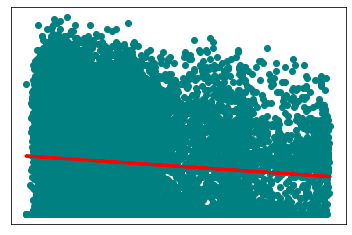

In [ ]:
plt.scatter(l2_test, y2_test,  color='teal')
plt.plot(l2_test, y2_pred, color='red', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
print('Coefficients: \n', regr2.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y2_test, y2_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y1_test, y2_pred))

Coefficients: 
 [[-9.80072428]]
Mean squared error: 477.27
Coefficient of determination: 0.00


#####Popularity vs Acousticness

In [ ]:
l3 = ml_data["acousticness"].values.reshape(-1,1)
y3 = ml_data["popularity"].values.reshape(-1,1)

In [ ]:
l3_train, l3_test, y3_train, y3_test = train_test_split(l3, y3, random_state=42, test_size=0.2)

In [ ]:
regr3 = linear_model.LinearRegression()
regr3.fit(l3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y3_pred = regr3.predict(l3_test)
y3_pred

array([[16.44282776],
       [34.21155168],
       [15.91820562],
       ...,
       [33.9834551 ],
       [14.41276816],
       [24.72273377]])

The table below, demonstrates the real values of popularities in the dataframe and the predicted values of the popularity that were guessed by the algorithm of linear regression according to the feature of acousticness.

In [ ]:
df3 = pd.DataFrame({'Actual': y3_test.flatten(), 'Predicted': y3_pred.flatten()})
df3

,Actual,Predicted
0,51,16.442828
1,52,34.211552
2,0,15.918206
3,81,27.254606
4,67,37.081007
...,...,...
34873,5,14.412768
34874,7,21.506572
34875,54,33.983455
34876,0,14.412768


This graph is the visualization of the data that are shown in the above table.

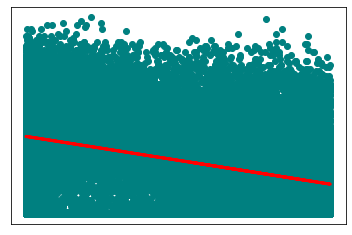

In [ ]:
plt.scatter(l3_test, y3_test,  color='teal')
plt.plot(l3_test, y3_pred, color='red', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
print('Coefficients: \n', regr3.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y3_test, y3_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y3_test, y3_pred))

Coefficients: 
 [[-22.80965844]]
Mean squared error: 403.38
Coefficient of determination: 0.16


By that, we got the coefficient of determination as 0,16. Although, it is still away from 1 , we can claim that the prediction is more reliable compared to the coefficient of determination value we got in the popularity vs danceability part. Thus, it wouldn't be wrong to say linear regression algorithm makes more correct predictions when the feature that is evaluated is acousticness not danceability.

#### Multiple Linear Regression

In [ ]:
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(ml_data.drop(["popularity"], axis=1), ml_data["popularity"], test_size=0.2, random_state=42)

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train_mlr, y_train_mlr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, ml_data.drop(["popularity"], axis=1).columns, columns=['Coefficient'])  
coeff_df

,Coefficient
acousticness,-8.338012e+00
danceability,-2.784503e+00
duration_ms,-9.082468e-07
energy,-4.663175e+00
instrumentalness,-1.584186e+01
liveness,-7.890246e+00
loudness,6.244499e-03
speechiness,-1.551186e+01
tempo,-1.260527e-02
valence,2.147052e+00


In [ ]:
mlr_predicted = regressor.predict(X_train_mlr)

print('Mean Absolute Error of Multiple Linear Regression for training:', metrics.mean_absolute_error(y_train_mlr, mlr_predicted))
print('Mean Squared Error of Multiple Linear Regression for training:', metrics.mean_squared_error(y_train_mlr, mlr_predicted))
print('Root Mean Squared Error of Multiple Linear Regression for training:', np.sqrt(metrics.mean_squared_error(y_train_mlr, mlr_predicted)))
print('R-square score of Multiple Linear Regression for training: ', metrics.r2_score(y_train_mlr, mlr_predicted))

Mean Absolute Error of Multiple Linear Regression for training: 13.348655663432995
Mean Squared Error of Multiple Linear Regression for training: 302.71457801777245
Root Mean Squared Error of Multiple Linear Regression for training: 17.39869472166727
R-square score of Multiple Linear Regression for training:  0.36685937470541674


In [ ]:
mlr_predicted_test = regressor.predict(X_test_mlr)

print('Mean Absolute Error of Multiple Linear Regression:', metrics.mean_absolute_error(y_test_mlr, mlr_predicted_test))
print('Mean Squared Error of Multiple Linear Regression:', metrics.mean_squared_error(y_test_mlr, mlr_predicted_test))
print('Root Mean Squared Error of Multiple Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test_mlr, mlr_predicted_test)))
print('R-square score of Multiple Linear Regression: ', metrics.r2_score(y_test_mlr, mlr_predicted_test))

Mean Absolute Error of Multiple Linear Regression: 13.284771491283928
Mean Squared Error of Multiple Linear Regression: 300.3320055318256
Root Mean Squared Error of Multiple Linear Regression: 17.330089599647938
R-square score of Multiple Linear Regression:  0.3737800560341852


In the above, we got the mean absolute error of 13.28. Since this is the first machine learning algorithm we used, it is early to make a comment. After, using other algorithms we will compare the mean absolute error and decide which one is better to use. 

The table below, demonstrates the real values of popularities in the dataframe and the predicted values of the popularity that were guessed by the algorithm of linear regression according to the all features of the songs.

In [ ]:
df4 = pd.DataFrame({'Actual': y_test_mlr, 'Predicted': mlr_predicted_test})
df5 = df4.head(15)
df5

,Actual,Predicted
139661,51,22.758020
32673,52,33.953126
144530,0,5.870499
10262,81,33.351670
16144,67,31.636021
137350,41,29.487755
42801,0,6.250162
44422,7,2.655102
45349,11,19.462039
118112,31,28.854606


This bar chart is the visualization of the predicted values and the real values. By looking at that, we can say that most of the time the linear regression algorithm prediction was more than the real popularity value.

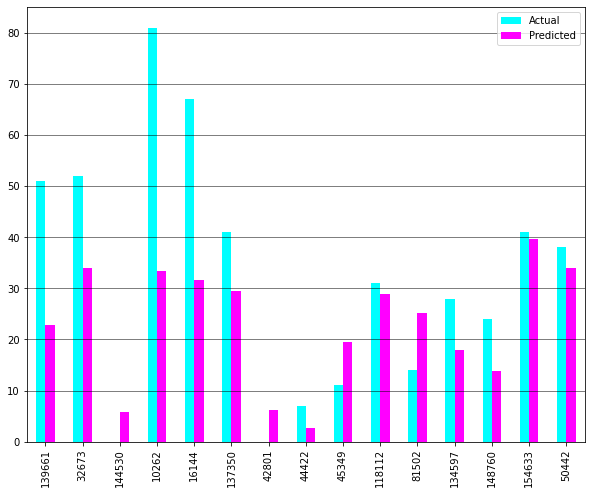

In [ ]:
df5.plot(kind='bar',figsize=(10,8), colormap="cool")
plt.grid(axis="y", linestyle='-', linewidth='0.5', color='black')
plt.show()

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#Random Forest Training
model_rf = RandomForestRegressor(random_state=42, max_depth=5)
model_rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
model_rf.feature_importances_

array([4.27924552e-03, 1.82303258e-05, 1.35147185e-05, 1.38660673e-05,
       7.70696746e-02, 9.62497266e-06, 1.38037462e-04, 1.51358588e-05,
       1.07294981e-05, 1.78404927e-03, 8.65233650e-01, 2.59646625e-03,
       4.88177749e-02])

This bar chart provides us the information of the importance ranking of the features while guessing the popularity. By looking at that chart, it can be claimed that the year, genres, instrumentalness features of the songs are important for popularity guessing. Besides, we can see that the features mode, liveness, tempo and explicit are not much related with the popularity of the song. We can try to improve our model by dropping these columns.

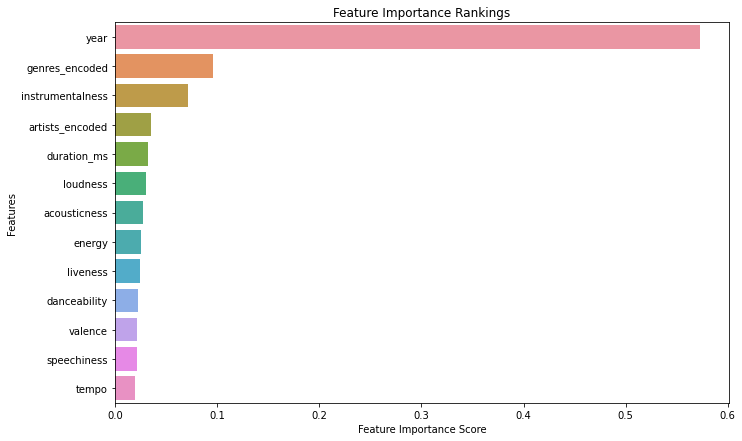

In [ ]:
feature_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(11, 7))
sns.barplot(x=feature_importances, y=feature_importances.index)

# Add labels to our graph  
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance Rankings")
plt.show()

In [ ]:
#Random Forest Testing (with validation set)
rf_predictions = model_rf.predict(X_val)

mse = mean_squared_error(Y_val, rf_predictions)
mae = mean_absolute_error(Y_val, rf_predictions)
rmse = np.sqrt(mse)

print("mse: {}".format(mse))
print("mae: {}".format(mae))
print("rmse: {}".format(rmse))

mse: 201.7207569140525
mae: 9.8230680219471
rmse: 14.202843268657599


The mean absolute error we get by random forest algorithm is less than we got in linear regression, which means that this algorithm is better for the prediction of popularity.

In [ ]:
mse = []
mae = []
rmse = []

depth_range = range(4,24,2)

for i in depth_range:
  model_rf = RandomForestRegressor(n_estimators=50, random_state=42, max_depth=i)
  model_rf.fit(X_train, Y_train)

  #Random Forest Testing (with validation set)
  rf_predictions = model_rf.predict(X_val)

  mse.append(mean_squared_error(Y_val, rf_predictions))
  mae.append(mean_absolute_error(Y_val, rf_predictions))
  rmse.append(np.sqrt(mse[-1]))


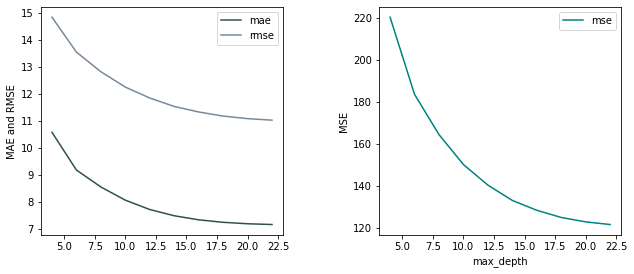

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(depth_range, mae, color="darkslategray", label="mae")
plt.plot(depth_range, rmse, color = "lightslategray", label="rmse")
plt.ylabel("MAE and RMSE")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(depth_range, mse, color="teal", label="mse")
plt.xlabel("max_depth")
plt.ylabel("MSE")
plt.legend()

plt.tight_layout(pad=5)
plt.show()

This graph demonstrates the importance of max_depth in the amount of errors. As it is seen in this graph, increasing max_depth decreases the errors , especially mean squared error.

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
regressor = DecisionTreeRegressor(random_state = 42, max_depth=15)
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
y_pred = regressor.predict(X_test)

The table below, demonstrates the real values of popularities in the dataframe and the predicted values of the popularity that were guessed by the algorithm of decision tree according to the features.

In [ ]:
da =pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred})
da

,Actual,Predicted
139661,51,38.000000
32673,52,35.867229
144530,0,0.000000
10262,81,33.534132
16144,67,51.125000
...,...,...
80893,5,6.000000
3488,7,5.375000
12222,54,38.605357
126990,0,0.096154


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 7.807980876878003
Mean Squared Error: 166.24108084128264
Root Mean Squared Error: 12.89345108344863


As a conclusion, in decision tree algorithm we get a mean absolute error that is less than the ones we got in the linear regression and random forest algorithm, which means that it is more reliable compared to them in popularity guessing. 


This is the representation of the decision tree in the form of text.

In [ ]:
regr = DecisionTreeRegressor(max_depth=4, random_state=1234)
model = regr.fit(X_train, Y_train)
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_10 <= 1956.50
|   |--- feature_10 <= 1953.50
|   |   |--- feature_11 <= 10483.50
|   |   |   |--- feature_11 <= 3729.00
|   |   |   |   |--- value: [1.93]
|   |   |   |--- feature_11 >  3729.00
|   |   |   |   |--- value: [5.75]
|   |   |--- feature_11 >  10483.50
|   |   |   |--- feature_12 <= 47.00
|   |   |   |   |--- value: [1.05]
|   |   |   |--- feature_12 >  47.00
|   |   |   |   |--- value: [3.19]
|   |--- feature_10 >  1953.50
|   |   |--- feature_10 <= 1955.50
|   |   |   |--- feature_12 <= 212.50
|   |   |   |   |--- value: [5.92]
|   |   |   |--- feature_12 >  212.50
|   |   |   |   |--- value: [10.99]
|   |   |--- feature_10 >  1955.50
|   |   |   |--- feature_4 <= 0.00
|   |   |   |   |--- value: [18.08]
|   |   |   |--- feature_4 >  0.00
|   |   |   |   |--- value: [13.39]
|--- feature_10 >  1956.50
|   |--- feature_4 <= 0.20
|   |   |--- feature_10 <= 1965.50
|   |   |   |--- feature_10 <= 1962.50
|   |   |   |   |--- value: [20.80]
|   |   |   |--- feature

Furthermore, it is possible to visualize our decision tree. The color of the leaf corresponds to the predicted value.

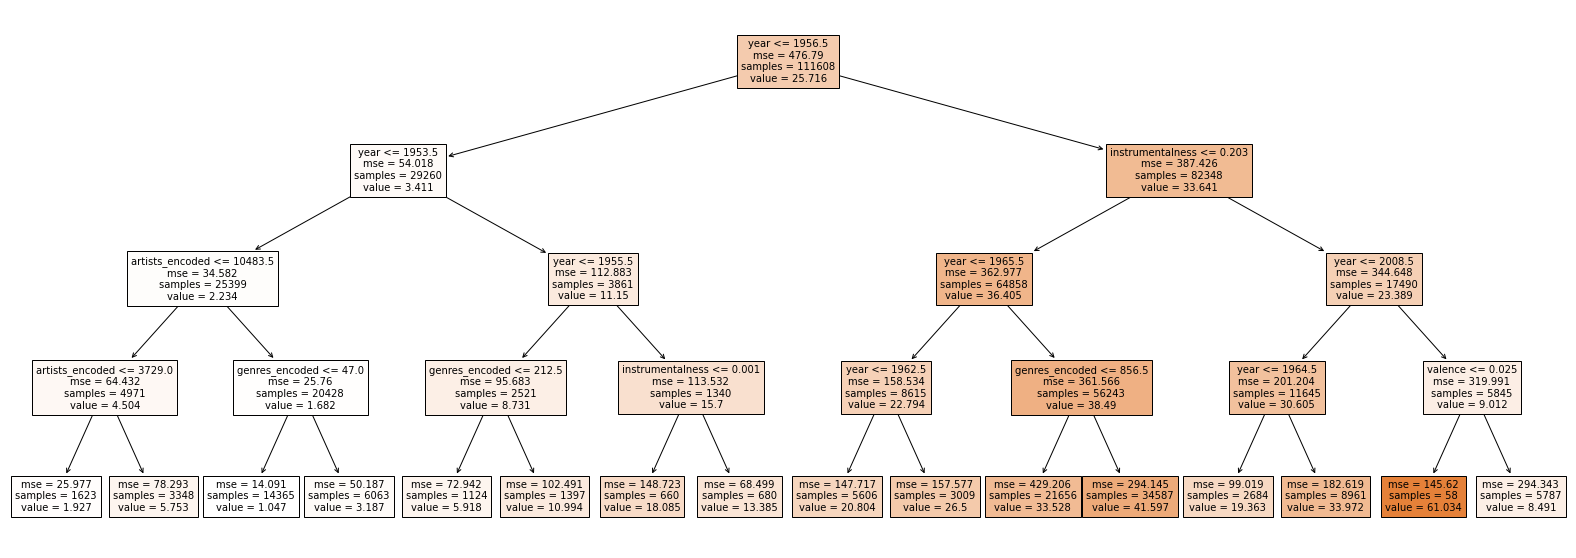

In [ ]:
fig = plt.figure(figsize=(28,10), facecolor = "white" , edgecolor="orange")
a= tree.plot_tree(regr, feature_names= X_train.columns, filled=True, fontsize=10)

Being different from our first decision tree algorithm example, this time as extra we will drop some of the attributes from our training dataset. 


In [ ]:
X_removed = X_train.drop(["acousticness", "year", "energy"] , axis=1)
Y = Y_train
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X_removed, Y, test_size=0.2, random_state=0)
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(x_train_2, y_train_2)
y_pred_2 = regressor.predict(x_test_2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_2, y_pred_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2, y_pred_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2)))

Mean Absolute Error: 13.645131360192734
Mean Squared Error: 405.519983070458
Root Mean Squared Error: 20.13752673667891


The mean absolute error was increased after we removed these attributes. This situation shows that these features are for our decision tree model important while guessing the popularity.

The following graph demonstrates the importance of max_depth in the amount of errors. 

In [ ]:
mse = []
mae = []
rmse = []

depth_range = range(4,20,2)

for i in depth_range:
  model_dt = DecisionTreeRegressor(random_state=42, max_depth=i)
  model_dt.fit(X_train, Y_train)

  #Random Forest Testing (with validation set)
  rf_predictions = model_dt.predict(X_val)

  mse.append(mean_squared_error(Y_val, rf_predictions))
  mae.append(mean_absolute_error(Y_val, rf_predictions))
  rmse.append(np.sqrt(mse[-1]))


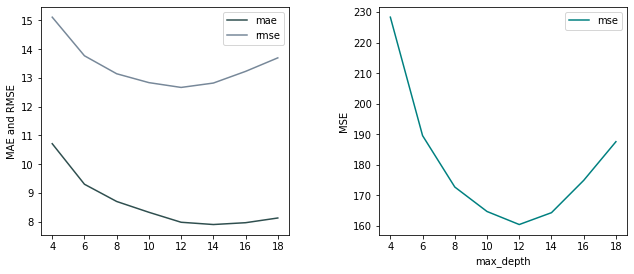

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(depth_range, mae, color="darkslategray", label="mae")
plt.plot(depth_range, rmse, color = "lightslategray", label="rmse")
plt.ylabel("MAE and RMSE")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(depth_range, mse, color="teal", label="mse")
plt.xlabel("max_depth")
plt.ylabel("MSE")
plt.legend()

plt.tight_layout(pad=5)
plt.show()

### Machine Learning for Song Recommendation

In this part, our purpose was to make a recommendation system that takes the name of the artists and the songs from the user and recommends similar songs to the user according to the values of the features of the songs that the user gave as input. To do so, we used nearest neighbor algorithm and chose the songs that are similar to the input song in the content of features.

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [ ]:
key_arr = []
val_arr = []

n = 5

for i in range(n):
  k = input("Enter artist name: ")
  v = input("Enter song name: ")
  print()
  key_arr.append(k)
  val_arr.append(v)

Enter artist name: Taylor Swift
Enter song name: Red

Enter artist name: Taylor Swift
Enter song name: 22

Enter artist name: Katy Perry
Enter song name: Roar

Enter artist name: One Direction
Enter song name: What Makes You Beautiful

Enter artist name: Selena Gomez
Enter song name: Lose You To Love Me



In [ ]:
print(key_arr)
print(val_arr)

['Taylor Swift', 'Taylor Swift', 'Katy Perry', 'One Direction', 'Selena Gomez']
['Red', '22', 'Roar', 'What Makes You Beautiful', 'Lose You To Love Me']


In [ ]:
fav_songs_df = pd.DataFrame(columns=df_main.columns)

for i in range(n):
  song = df_main.loc[(df_main['name'] == val_arr[i]) & (df_main['artist'] == key_arr[i])]
  song = song.head(1)
  fav_songs_df = fav_songs_df.append(song)

In [ ]:
fav_songs_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,artist,genres
37694,0.07730,['Taylor Swift'],0.602,220827,0.896,0,0cITLOYn1Sv4q27zZPqlNK,0.000089,1,0.0910,-4.267,0,Red,61,2012-10-22,0.0437,124.978,0.6410,2012,Taylor Swift,"'dance pop', 'pop'"
37804,0.00215,['Taylor Swift'],0.658,230133,0.729,0,3bIxTsfeNMO7Nt2J3EUKrA,0.001300,7,0.0752,-6.561,1,22,60,2012-10-22,0.0378,104.007,0.6680,2012,Taylor Swift,"'dance pop', 'pop'"
37834,0.00487,['Katy Perry'],0.554,223546,0.772,0,6F5c58TMEs1byxUstkzVeM,0.000007,7,0.3540,-4.821,0,Roar,74,2013-10-18,0.0418,179.984,0.4550,2013,Katy Perry,"'dance pop', 'pop', 'pop dance', 'post-teen pop'"
18282,0.00900,['One Direction'],0.726,199987,0.787,0,4cluDES4hQEUhmXj6TXkSo,0.000000,4,0.0596,-2.494,1,What Makes You Beautiful,82,2012-05-25,0.0737,124.990,0.8880,2012,One Direction,"'boy band', 'pop', 'post-teen pop', 'talent show'"
39406,0.55600,['Selena Gomez'],0.488,206459,0.343,0,4l0Mvzj72xxOpRrp6h8nHi,0.000000,4,0.2100,-8.985,1,Lose You To Love Me,83,2020-01-10,0.0436,102.819,0.0978,2020,Selena Gomez,"'dance pop', 'pop', 'pop dance', 'post-teen pop'"


In [ ]:
fav_songs_df = fav_songs_df.drop(["artists", "id", "key", "mode", "release_date","popularity","duration_ms", "name", "artist", "genres"], axis=1)

In [ ]:
fav_songs_df

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,speechiness,tempo,valence,year
37694,0.07730,0.602,0.896,0,0.000089,0.0910,-4.267,0.0437,124.978,0.6410,2012
37804,0.00215,0.658,0.729,0,0.001300,0.0752,-6.561,0.0378,104.007,0.6680,2012
37834,0.00487,0.554,0.772,0,0.000007,0.3540,-4.821,0.0418,179.984,0.4550,2013
18282,0.00900,0.726,0.787,0,0.000000,0.0596,-2.494,0.0737,124.990,0.8880,2012
39406,0.55600,0.488,0.343,0,0.000000,0.2100,-8.985,0.0436,102.819,0.0978,2020


In [ ]:
feature_means = [[]]  
for i in fav_songs_df:
  feature_means[0].append(fav_songs_df[i].mean())
feature_means[0]

[0.129864,
 0.6055999999999999,
 0.7054,
 0.0,
 0.00027906,
 0.15796,
 -5.4256,
 0.04812,
 127.35560000000001,
 0.5499599999999999,
 2013.8]

In [ ]:
from sklearn.neighbors import NearestNeighbors

samples = df_main
samples = samples.drop(["artists", "id", "key", "mode", "release_date", "name", "popularity","duration_ms","artist", "genres"], axis=1)

neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(samples)

results = neigh.kneighbors(feature_means)
results

(array([[0.4828782 , 0.72805252, 0.80099924, 0.87370383, 0.87744886]]),
 array([[ 75215, 140797, 172873,  38028, 172966]]))

In [ ]:
for result in results[1][0]:
  res = df_main.loc[result]
  print(res["name"], "-", res["artist"])

Promised Land 2013 - Ondagroove Remix - Anthony Thomas, Kim Jay
Lose Yourself - Reepr Remix - MC Freeflow
Resist and Bite - Sabaton
All The Time - Bahamas
Indigo - Kid Massive


##Conclusion

To conclude, at first we loaded our data models into our notebook. Only loading the data was not enough and we also needed to check if the dataset is consistent and values are valid. After checking the values, we saw that there was no mistake but to get a much more larger scale of key and value pairs then we manipulated our dataset to be able to reach genres. Since we wanted to understand and observe our data, we analyzed our data in various ways. We used plots, scatters, histograms and line graphs to learn and get used to our data.


Secondly, we came up with two hypotheses. The first hypothesis we selected was that "Popularity is same for all modes." and the second hypothesis was "Before and after 2000's the features Danceability, Popularity and Acousticness doesn't change.". After conducting experiments and ploting graphs with their p_values we came up to a result that the null hypothesis were not correct. So, we next claimed that alternative hypothesis were correct. These alternative hypothesis were "Popularity is not same for all modes" and "Before and after 2000's the features Danceability, Popularity and Acousticness changed.".

Lastly, in the machine learning step, we had two purposes that were predicting the popularity of the songs according to their features and create a simple song recommendation system. We used several machine learning algorithms which were linear regression, decision tree, and random forest in order to have same guess, if not a close guess to the real popularity value. We have observed that none of those machine learning algorithms gave us values that were really close to the real value. However, we saw the importance of hyperparameter tuning. As an example of that, we changed the value of max_depth for machine learning algorithms and as a result of this we got more close results that was understood by the decrease in the errors. Besides, after comparing those three machine learning algorithms we saw that decision tree algorithm was a better machine learning algorithm for our dataset and our purpose. For the second part of the task, we took song names and artist names as input from the user and by evaluating the features means of the songs that exist in our dataset we gave the user the most similar songs to the previously given input.